# Travel Insurance Prediction Analysis

## Introduction

### Project Overview
This notebook aims to predict which customers are likely to purchase a travel insurance package, including Covid cover, offered by a Tour & Travels Company. Using 2019 data from approximately 2000 customers, we will build a predictive model.

### About the Dataset

- **Context**: The dataset provides information on customers from 2019, detailing their likelihood of purchasing a travel insurance package.
  
- **Features**:
  - **Age**: Customer's age
  - **Employment Type**: Sector in which the customer works
  - **GraduateOrNot**: Whether the customer is a college graduate
  - **AnnualIncome**: Yearly income in INR (rounded to the nearest 50k)
  - **FamilyMembers**: Number of family members
  - **ChronicDisease**: Presence of major diseases (e.g., diabetes, high BP)
  - **FrequentFlyer**: Booked air tickets at least 4 times in the last 2 years
  - **EverTravelledAbroad**: Whether the customer has traveled abroad
  - **TravelInsurance**: Whether the customer purchased insurance in 2019


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [25]:
import warnings 

warnings.filterwarnings("ignore")

In [26]:
sns.set(style="white", palette="deep", context="notebook")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

###  Dataset Overview

In [27]:
df_travel = pd.read_csv("travel_insurance_data.csv", index_col = 0)

df_travel.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [28]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


- No null values

In [29]:
df_travel.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [30]:
summary_non_numerical = df_travel.describe(include=['object']).T

display(summary_non_numerical)

,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607


- Check for Duplicated rows

In [31]:
print(f"The number for duplicated observations in this dataset are {df_travel.duplicated().sum()}")

The number for duplicated observations in this dataset are 738


### Data Cleaning

In [32]:
df_travel.rename(columns = {'Employment Type': 'EmploymentType'},inplace = True)

In [33]:
df_travel = df_travel.drop_duplicates().reset_index(drop = True)

- Adjusting the Annual Income Currency from INR to USD

In [34]:
exchange_rate_inr_to_usd = 83

df_travel['AnnualIncome'] = df_travel['AnnualIncome'] / exchange_rate_inr_to_usd

- Encode Binary categorical columns to numerical values 1 and 0

In [35]:
binary_columns = [col for col in df_travel.columns if df_travel[col].nunique() == 2]

In [36]:
df_travel[binary_columns].head()

,EmploymentType,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,Government Sector,Yes,1,No,No,0
1,Private Sector/Self Employed,Yes,0,No,No,0
2,Private Sector/Self Employed,Yes,1,No,No,1
3,Private Sector/Self Employed,Yes,1,No,No,0
4,Private Sector/Self Employed,Yes,1,Yes,No,0


- we have three columns that are suitable for binary encoding

In [37]:
selected_columns = [binary_columns[i] for i in [1, 3, 4]]

df_travel[selected_columns].head()

,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Yes,No,No
1,Yes,No,No
2,Yes,No,No
3,Yes,No,No
4,Yes,Yes,No


In [38]:
for col in selected_columns:
    df_travel[col] = df_travel[col].map({'Yes': 1, 'No': 0})

display(df_travel.head())

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,4819.277108,6,1,0,0,0
1,31,Private Sector/Self Employed,1,15060.240964,7,0,0,0,0
2,34,Private Sector/Self Employed,1,6024.096386,4,1,0,0,1
3,28,Private Sector/Self Employed,1,8433.734940,3,1,0,0,0
4,28,Private Sector/Self Employed,1,8433.734940,8,1,1,0,0


In [39]:
df_travel.dtypes

Age                      int64
EmploymentType          object
GraduateOrNot            int64
AnnualIncome           float64
FamilyMembers            int64
ChronicDiseases          int64
FrequentFlyer            int64
EverTravelledAbroad      int64
TravelInsurance          int64
dtype: object

# Explotary Data Analysis:

### Univariate Analysis

- Examine variable distribution (mean, median, mode, variance, skewness, normality)
- Identify outliers and anomalies
- Visualize with histograms, box plots, and bar charts
- Assess variable skewness and kurtosis
- Support hypothesis testing with variable insights
- Inform feature engineering decisions

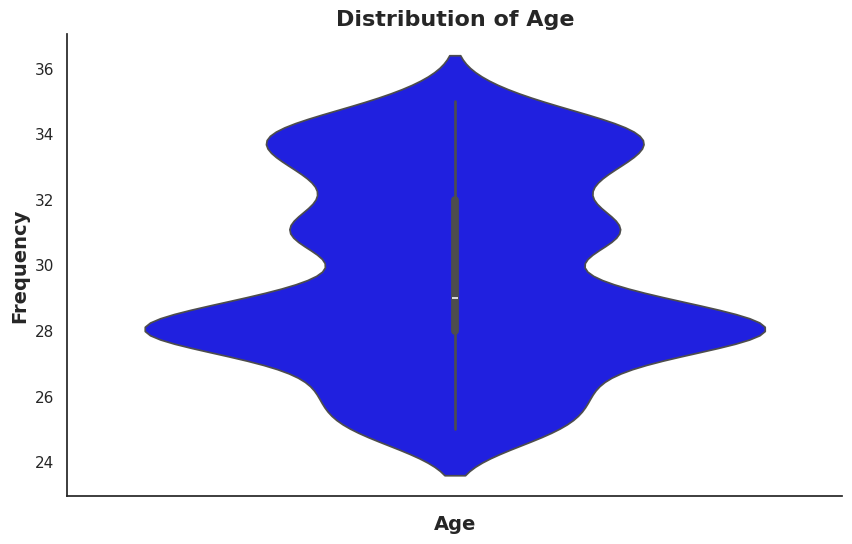

In [42]:

plt.figure(figsize=(10, 6))
sns.violinplot(df_travel['Age'], color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

sns.despine()
plt.show()